In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

In [2]:
class Singer:
    def __init__(self, singer_id, group):
        self.singer_id = singer_id
        self.group = group
        self.quartet_skill = self.assign_skill_based_on_group()
        self.having_fun = None

    def assign_skill_based_on_group(self):
        match self.group:
            case 'A':
                return np.random.randint(75, 90)
            case 'B':
                return np.random.randint(65, 85)
            case 'C':
                return np.random.randint(55, 70)
            case _:
                raise ValueError("Invalid group")

    def update_fun(self, avg_skill):
        skill_difference = abs(self.quartet_skill - avg_skill)
        self.having_fun = 100 - np.clip((skill_difference ** 2) / 4, 0, 100)

class Quartet:
    def __init__(self, singers):
        self.singers = singers
        avg_skill = np.mean([s.quartet_skill for s in singers])
        for singer in singers:
            singer.update_fun(avg_skill)
        self.quartet_fun = np.mean([s.having_fun for s in singers])
        self.disparity = np.std([s.quartet_skill for s in singers])

In [3]:
def create_singers(num_singers, dist_a, dist_b):
    singers = []
    num_a = int(num_singers * dist_a)
    num_b = int(num_singers * dist_b)
    num_c = num_singers - (num_a + num_b)  # Ensure total equals num_singers

    for _ in range(num_a):
        singers.append(Singer(len(singers), 'A'))
    for _ in range(num_b):
        singers.append(Singer(len(singers), 'B'))
    for _ in range(num_c):
        singers.append(Singer(len(singers), 'C'))

    return singers

In [4]:
def create_random_quartets(singers):
    shuffle(singers)
    quartets = [Quartet(singers[i:i+4]) for i in range(0, len(singers), 4)]
    return quartets

In [5]:
def create_compatible_quartets(singers):
    np.random.shuffle(singers)  # Randomize the singer list using numpy

    # Categorize singers into groups using numpy arrays for efficiency
    groups = {'A': [], 'B': [], 'C': []}
    for singer in singers:
        groups[singer.group].append(singer)

    quartets = []

    # Helper function to pop four singers from a group if available
    def pop_four(group_list):
        if len(group_list) >= 4:
            return [group_list.pop() for _ in range(4)]
        return None

    # Try to form quartets within the same group first
    for group in ['A', 'B', 'C']:
        while len(groups[group]) >= 4:
            quartets.append(Quartet(pop_four(groups[group])))

    # Mix groups if necessary, A with B, and B with C
    while len(groups['A']) >= 2 and len(groups['B']) >= 2:
        quartets.append(Quartet([groups['A'].pop() for _ in range(2)] + [groups['B'].pop() for _ in range(2)]))
    while len(groups['B']) >= 2 and len(groups['C']) >= 2:
        quartets.append(Quartet([groups['B'].pop() for _ in range(2)] + [groups['C'].pop() for _ in range(2)]))

    # If any singers remain, randomly assign them to make up enough for one last quartet
    remaining_singers = [singer for group_list in groups.values() for singer in group_list]
    if len(remaining_singers) >= 4:
        np.random.shuffle(remaining_singers)
        quartets.append(Quartet([remaining_singers.pop() for _ in range(4)]))

    return quartets

In [6]:
NB_SESSIONS = 1000
MIN_SINGERS = 48
RATIO_GROUP_A = 2/7
RATIO_GROUP_B = 2/7

# Function to run a single session simulation
def run_simulation(compatible_quartets=False):
    session_fun_values = []
    session_disparity_values = []

    for _ in range(NB_SESSIONS):
        num_singers = MIN_SINGERS + 4 * np.random.randint(0, 11)
        singers = create_singers(num_singers, RATIO_GROUP_A, RATIO_GROUP_B)
        
        if compatible_quartets:
            quartets = create_compatible_quartets(singers)
        else:
            quartets = create_random_quartets(singers)  # Assuming you want the same compatible function here
        
        quartet_fun_values = [q.quartet_fun for q in quartets]
        disparity_values = [q.disparity for q in quartets]
        
        session_fun_values.extend(quartet_fun_values)
        session_disparity_values.extend(disparity_values)

    return session_fun_values, session_disparity_values

def plot_results(fun_values, disparity_values):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(fun_values, bins=20, color='blue', alpha=0.7)
    plt.title('Distribution of Quartet Fun Values')
    plt.xlabel('Quartet Fun')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(disparity_values, bins=20, color='red', alpha=0.7)
    plt.title('Distribution of Disparity Values')
    plt.xlabel('Disparity')
    plt.ylabel('Frequency')
    plt.suptitle("Fun metric of quartet formation")
    plt.show()

    # Display results
    print(f"Fun mean : {np.mean(fun_values)}")
    print(f"Fun std : {np.std(fun_values)}")
    print(f"Disparity mean : {np.mean(disparity_values)}")

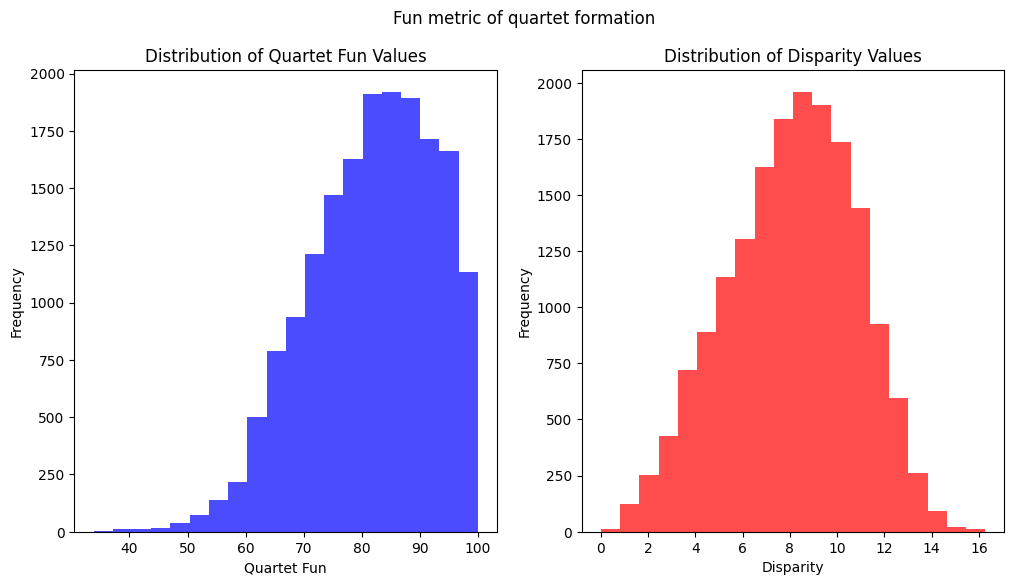

Fun mean : 81.83685834611155
Fun std : 10.836265006192136
Disparity mean : 8.085455078372751


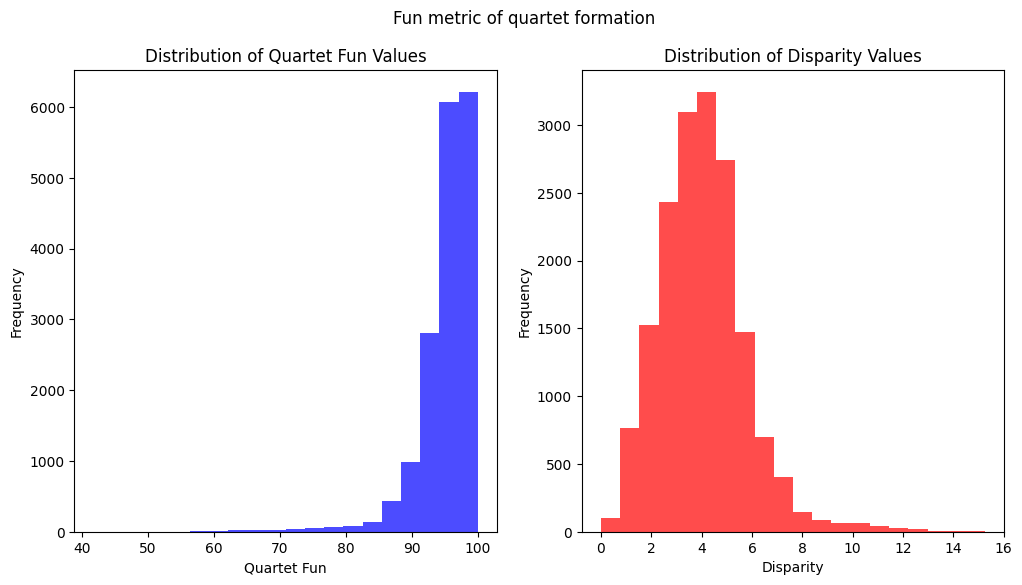

Fun mean : 95.1797384130249
Fun std : 4.404395921648246
Disparity mean : 4.0471308160025785


In [7]:
plot_results(*run_simulation(compatible_quartets=False))
plot_results(*run_simulation(compatible_quartets=True))